The vastly different boundary conditions that we use in our analysis require vastly different numerical treatments, particularly parameters of the problem. There was no universal code that we could develop to simply apply to different boundary conditions. Each problem had little differences in the lattice sizes, iterations, plotting parameters etc. To this end, we have refrained from defining global functions, instead, we write short codes for each Boundary Condition.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arctan
import scipy.linalg as lin

# Various Boundary Conditions

## A point charge

<ipython-input-106-425c7dd93537>:67: RuntimeWarning: invalid value encountered in true_divide
  EX = Ex/norm
<ipython-input-106-425c7dd93537>:68: RuntimeWarning: invalid value encountered in true_divide
  EY = Ey/norm


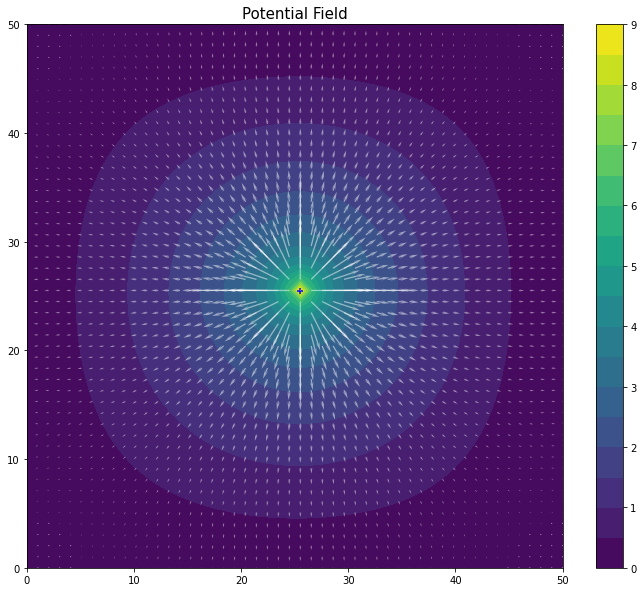

In [106]:
plt.rcParams['figure.figsize']=[12,10]

# Create
N = 50
V = np.zeros((N, N))

# Define Boundaries
V[25, 25] = 9

# Store boundary data for visualization 
def Boundaries(N):
    BC = np.zeros((N, N)) 
    BC[25, 25] = 9
    
    liveX=[]
    liveY=[]
    neuX=[]
    neuY=[]
    for i in range (0, N):
        for j in range (0, N):
            if BC[i, j] > 1:
                liveX.append(j+0.5)
                liveY.append(i+0.5)
                
            elif BC[i,j] == 1:    
                neuX.append(j+0.5)
                neuY.append(i+0.5)
                
    plt.scatter(neuX, neuY, marker = 'x', color = 'blue', label = 'Neutral Electrode')
    plt.scatter(liveX, liveY, marker = '+', color = 'blue', label = 'Positive Electrode')
    return 

# Relaxation 
for iterations in range (0, 1200):

    for x in range (0, N-1):
        for y in range (0, N-1):

            V[x, y] = (V[x-1, y] + V[x+1, y] + V[x, y+1] + V[x, y-1])/4
            
            # Reinforce boundaries
            V[25, 25] = 9

# Contour Plot
xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = V

X, Y = np.meshgrid(xlist, ylist)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 18)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Potential Field', fontsize = 15)

Boundaries(N)

#Electric Field
Ex = np.zeros((N,N))
Ey = np.zeros((N,N))

for i in range (0, N):
    Ex[i,:] = np.gradient(V[i,:])*(-1)
for j in range (0, N):
    Ey[:,j] = np.gradient(V[:,j])*(-1)
norm = np.sqrt(Ex**2 + Ey**2)
EX = Ex/norm
EY = Ey/norm
plt.quiver(X, Y, Ex, Ey, color='white', headlength=7, alpha = 0.5)

plt.show()



## Bar Electrodes

In [103]:
plt.rcParams['figure.figsize']=[12,10]

N= 10
M= 50
V = np.zeros((N, M))

#Boundary Conditions
V[1:2 , 10:40] = 9  
V[8:9 , 10:40] = 0
 
# Relaxation 
for iterations in range (0, 200):

    for x in range (0, N-1):
        for y in range (0, M-1):

            V[x, y] = (V[x-1, y] + V[x+1, y] + V[x, y+1] + V[x, y-1])/4
            
            #Reinforcing Boundary conditions
            V[1:2 , 10:40] = 9  
            V[8:9 , 10:40] = 0

<ipython-input-104-c9d8e1b6a5d8>:50: RuntimeWarning: invalid value encountered in true_divide
  EX = Ex/norm
<ipython-input-104-c9d8e1b6a5d8>:51: RuntimeWarning: invalid value encountered in true_divide
  EY = Ey/norm


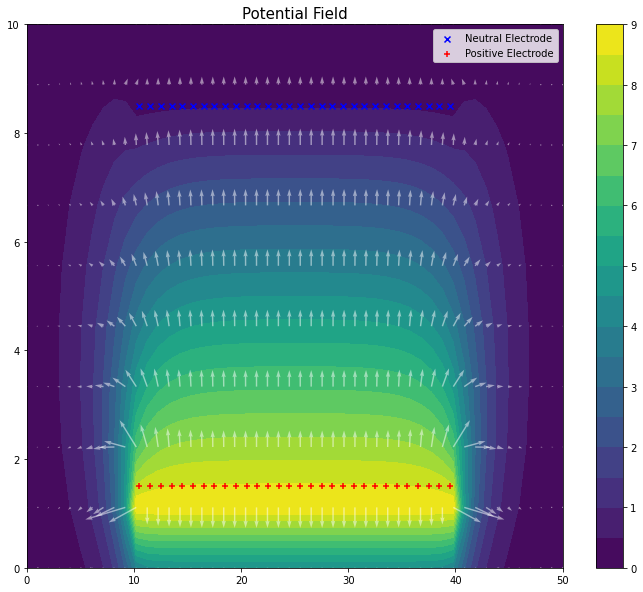

In [104]:
# Visualizing boundaries

def Boundaries(N, M):
    BC = np.zeros((N, M)) 
    BC[1:2 , 10:40] = 9  
    BC[8:9 , 10:40] = 1
    
    liveX=[]
    liveY=[]
    neuX=[]
    neuY=[]
    for i in range (0, N):
        for j in range (0, M):
            if BC[i, j] > 1:
                liveX.append(j+0.5)
                liveY.append(i+0.5)
                #plt.scatter(j, i, color = 'red', alpha = 0.2)
            elif BC[i,j] == 1:    
                #plt.scatter(j, i, color = 'blue', alpha = 0.2)
                neuX.append(j+0.5)
                neuY.append(i+0.5)
    plt.scatter(neuX, neuY, marker = 'x', color = 'blue', label = 'Neutral Electrode')
    plt.scatter(liveX, liveY, marker = '+', color = 'red', label = 'Positive Electrode')
    return 

#Contour Plot
xlist = np.linspace(0, M, M)
ylist = np.linspace(0, N, N)

Z = V

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 18)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Potential Field', fontsize = 15)

Boundaries(N, M)

#Electric Field
Ex = np.zeros((N,M))
Ey = np.zeros((N,M))

for i in range (0, N):
    Ex[i,:] = np.gradient(V[i,:])*(-1)
for j in range (0, M):
    Ey[:,j] = np.gradient(V[:,j])*(-1)
norm = np.sqrt(Ex**2 + Ey**2)
EX = Ex/norm
EY = Ey/norm
plt.quiver(X, Y, Ex, Ey, color='white', headlength=5, alpha = 0.5)

plt.legend()
plt.show()

## Electric Dipole

In [38]:
#Dipole
plt.rcParams['figure.figsize']=[17,10]

N = 50
V = np.zeros((N, N))

# Boundary Conditions
V[25, 20] = 9
V[25, 30] = -9

# Relaxation
for interations in range (0, 1000):

    for x in range (0, N-1):
        for y in range (0, N-1):

            V[x, y] = (V[x-1, y] + V[x+1, y] + V[x, y+1] + V[x, y-1])/4
            
            #Reinforcing Boundary conditions
            V[25, 20] = 9
            V[25, 30] = -9

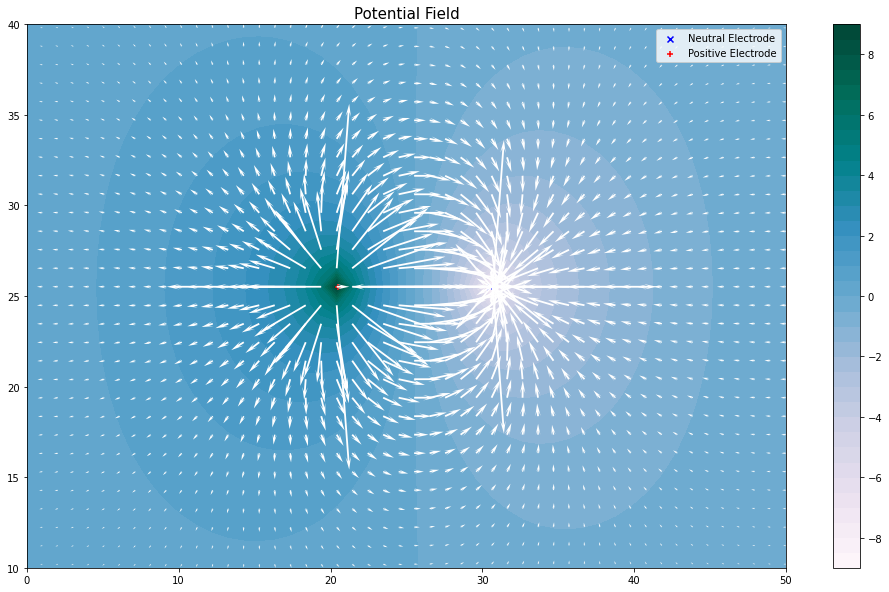

In [44]:
def Boundaries(N):
    BC = np.zeros((N, N)) 
    BC[25, 20] = 9
    BC[25, 30] = -9
    
    liveX=[]
    liveY=[]
    neuX=[]
    neuY=[]
    for i in range (0, N):
        for j in range (0, N):
            if BC[i, j] > 1:
                liveX.append(j+0.5)
                liveY.append(i+0.5)
                
            elif BC[i,j] < 0:    
                
                neuX.append(j+0.5)
                neuY.append(i+0.5)
    plt.scatter(neuX, neuY, marker = 'x', color = 'blue', label = 'Neutral Electrode')
    plt.scatter(liveX, liveY, marker = '+', color = 'red', label = 'Positive Electrode')
    return 

# Contour Plot
xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = V

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 40, cmap = 'PuBuGn')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Potential Field', fontsize = 15)

ax.set_ylim(10, 40)
Boundaries(N)


#Electric Field 
Ex = np.zeros((N,N))
Ey = np.zeros((N,N))

for i in range (0, N):
    Ex[i,:] = np.gradient(V[i,:])*(-1)
for j in range (0, N):
    Ey[:,j] = np.gradient(V[:,j])*(-1)
norm = 1 #np.sqrt(Ex**2 + Ey**2)
EX = Ex/norm
EY = Ey/norm

plt.quiver(X, Y, EX, EY, color='white', headlength=7, alpha = 1)

plt.legend()
plt.show()

Note that there is some misbehaviour in the electric field above, particularly near the charge points. Initially I thought this may be due to a coarse lattice, but a finer lattice didn't resolve the issue. I wasn't able to debug the code for this.

## Arbitrary Boundary Conditions

In [45]:
plt.rcParams['figure.figsize']=[18,16]
N= 50
V = np.zeros((N, N))

# Boundary Conditions
V[:,0]  = 9
V[:,N-1] = 9
V[0, 1:(N-1)] = 0
V[(N-1), 1:(N-1)] = 0
V[20, 20:30] = 9
V[30, 20:30] = 9
V[21:30, 20] = 0
V[21:30, 29] = 0    


for interations in range (0, 500):

    for x in range (0, N-1):
        for y in range (0, N-1):

            V[x, y] = (V[x-1, y] + V[x+1, y] + V[x, y+1] + V[x, y-1])/4
            
            # Reinforcing Boundaries
            V[:,0]  = 9
            V[:,N-1] = 9
            V[0, 1:(N-1)] = 0
            V[(N-1), 1:(N-1)] = 0
            V[20, 20:30] = 9
            V[30, 20:30] = 9
            V[21:30, 20] = 0
            V[21:30, 29] = 0  

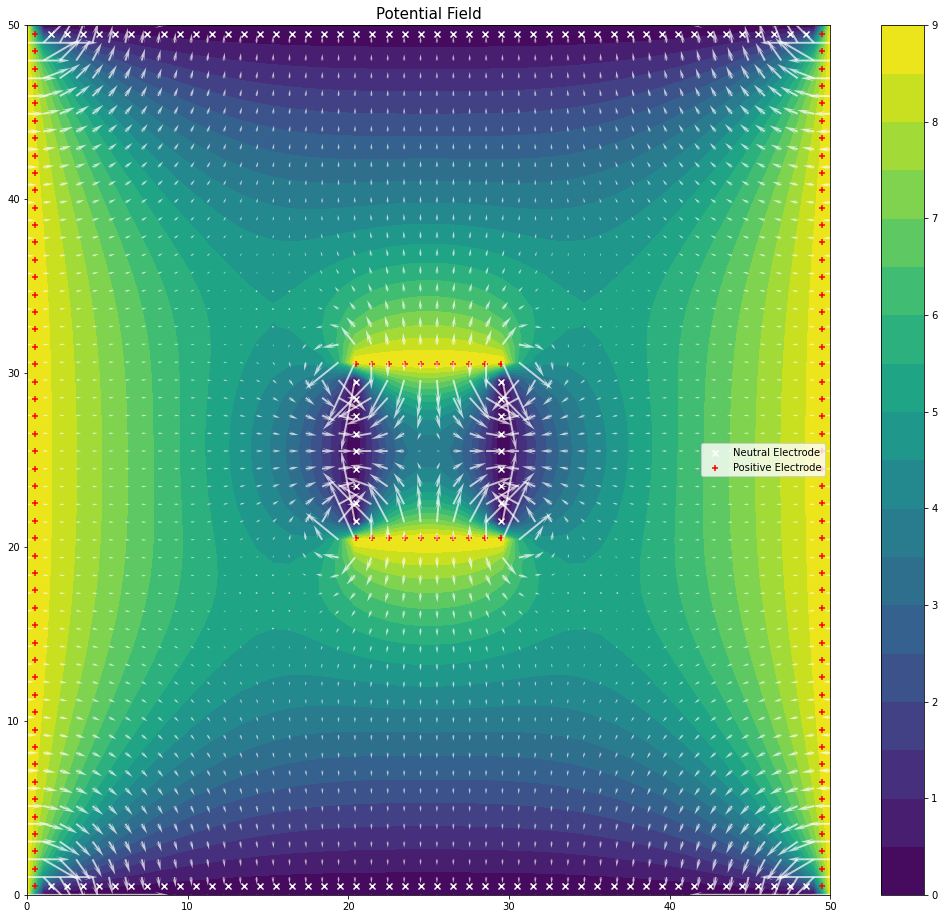

In [46]:
def Boundaries(N):
    BC = np.zeros((N, N)) 
    BC[:,0]  = 9
    BC[:,N-1] = 9
    BC[0, 1:(N-1)] = 1             #We define the neutral boundaries as '1' so that they can be distinguished from 
                                   # zero elements
    BC[(N-1), 1:(N-1)] = 1
    BC[20, 20:30] = 9
    BC[30, 20:30] = 9
    BC[21:30, 20] = 1              
    BC[21:30, 29] = 1  
    
    liveX=[]
    liveY=[]
    neuX=[]
    neuY=[]
    for i in range (0, N):
        for j in range (0, N):
            if BC[i, j] > 1:
                liveX.append(j+0.5)
                liveY.append(i+0.5)
                
            elif BC[i,j] == 1:    
                
                neuX.append(j+0.5)
                neuY.append(i+0.5)
    plt.scatter(neuX, neuY, marker = 'x', color = 'white', label = 'Neutral Electrode')
    plt.scatter(liveX, liveY, marker = '+', color = 'red', label = 'Positive Electrode')
    return 

#Visualization
xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = V

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 18)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Potential Field', fontsize = 15)

Boundaries(N)

#Electric Field
Ex = np.zeros((N,N))
Ey = np.zeros((N,N))

for i in range (0, N):
    Ex[i,:] = np.gradient(V[i,:])*(-1)
for j in range (0, N):
    Ey[:,j] = np.gradient(V[:,j])*(-1)
norm = np.sqrt(Ex**2 + Ey**2)
EX = Ex/norm
EY = Ey/norm

plt.quiver(X, Y, Ex, Ey, color='white', headlength=7, alpha = 0.7)

plt.legend()
plt.show()

# Visualizing relaxation with iterations

We do this for the point charge case.

In [251]:

import sys
from matplotlib.animation import FuncAnimation

#fig, ax = plt.subplots(1,1)
#fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.

print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Create
N = 50
V = np.zeros((N, N))
V[25, 25] = 9
# Contour Plot
xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = V

X, Y = np.meshgrid(xlist, ylist)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 18)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Potential Field', fontsize = 15)

def update(i):
    label = 'Iteration {0}'.format(i)
    print(label)
    
    for x in range (0, N-1):
        for y in range (0, N-1):

            V[x, y] = (V[x-1, y] + V[x+1, y] + V[x, y+1] + V[x, y-1])/4
            
            # Reinforce boundaries
            V[25, 25] = 9
            
    # Contour Plot
    xlist = np.linspace(0, N, N)
    ylist = np.linspace(0, N, N)

    X, Y = np.meshgrid(xlist, ylist)
    ax.contourf(X, Y, V, 18)
    ax.set_title('Potential Field', fontsize = 15)
    ax.set_xlabel(label)
    return ax

#anim = FuncAnimation(fig, update, frames=np.arange(0, 500), interval=100)
    
#anim.save('Relaxation.gif', dpi=20, writer='pillow')

fig size: 72.0 DPI, size in inches [12. 10.]


# Numerically analyzing convergence
We define error as the difference between the squared sum of the discrete potential field for each step and the previous one.

## Point Charge

In [88]:
plt.rcParams['figure.figsize']=[12,10]

# Create
N = 50
V = np.zeros((N, N))

# convergence arrays
def obj(V):
    return np.sum(V**2)
s = 0
error = []
iters = []

# Relaxation 
for iterations in range (0, 1500):

    for x in range (0, N-1):
        for y in range (0, N-1):

            V[x, y] = (V[x-1, y] + V[x+1, y] + V[x, y+1] + V[x, y-1])/4
            
            # Reinforce boundaries
            V[25, 25] = 9
            
    # Convergence calculations       
    sp = s 
    s = obj(V)
    err = s-sp
    error.append(err)
    iters.append(iterations)


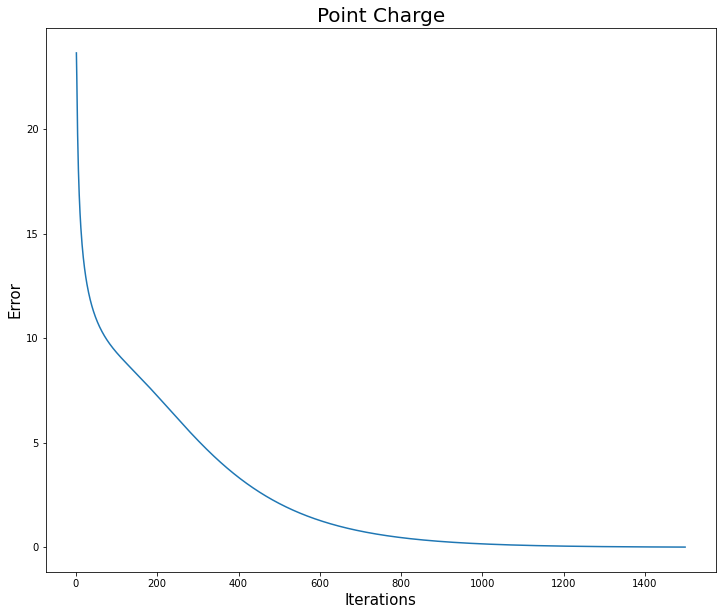

In [97]:
plt.plot(iters[1:], error[1:])
plt.xlabel("Iterations", fontsize = 15)
plt.ylabel("Error", fontsize = 15)
plt.title("Point Charge", fontsize = 20)
plt.show()

## Bar electrodes

In [107]:
plt.rcParams['figure.figsize']=[12,10]

N= 10
M= 50
V = np.zeros((N, M))

#Boundary Conditions
V[1:2 , 10:40] = 9  
V[8:9 , 10:40] = 0
 

# convergence arrays
def obj(V):
    return np.sum(V**2)
s = 0
error = []
iters = []

# Relaxation 
for iterations in range (0, 2000):

    for x in range (0, N-1):
        for y in range (0, M-1):

            V[x, y] = (V[x-1, y] + V[x+1, y] + V[x, y+1] + V[x, y-1])/4
            
            #Reinforcing Boundary conditions
            V[1:2 , 10:40] = 9  
            V[8:9 , 10:40] = 0
            
    # Convergence calculations       
    sp = s 
    s = obj(V)
    err = s-sp
    error.append(err)
    iters.append(iterations)

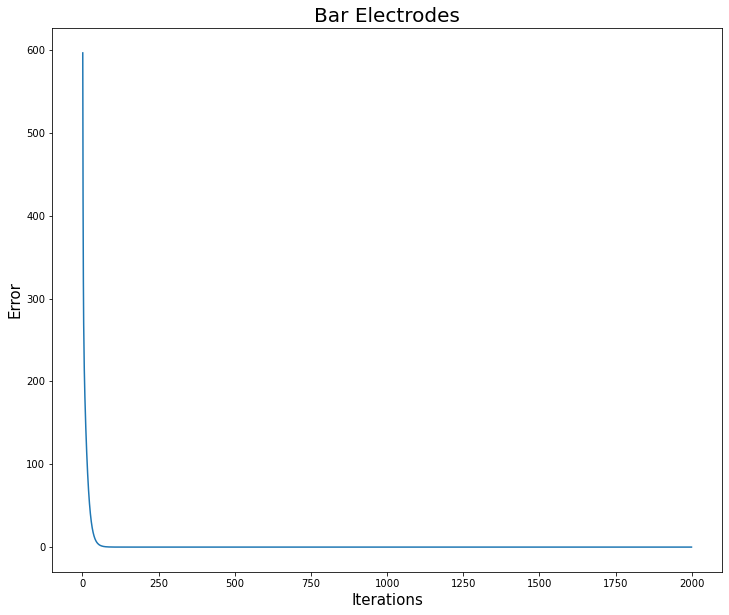

In [108]:
plt.plot(iters[1:], error[1:])
plt.xlabel("Iterations", fontsize = 15)
plt.ylabel("Error", fontsize = 15)
plt.title("Bar Electrodes", fontsize = 20)
plt.show()

The fast convergence for the bar electrodes case is in fact quite intriguing. 

## Electric Dipole

In [123]:
#Dipole

N = 50
V = np.zeros((N, N))

# Boundary Conditions
V[25, 20] = 9
V[25, 30] = -9

# convergence arrays
def obj(V):
    return np.sum(V**2)
s = 0
error = []
iters = []

# Relaxation
for iterations in range (0, 1000):

    for x in range (0, N-1):
        for y in range (0, N-1):

            V[x, y] = (V[x-1, y] + V[x+1, y] + V[x, y+1] + V[x, y-1])/4
            
            #Reinforcing Boundary conditions
            V[25, 20] = 9
            V[25, 30] = -9
    # Convergence calculations       
    sp = s 
    s = obj(V)
    err = s-sp
    error.append(err)
    iters.append(iterations)

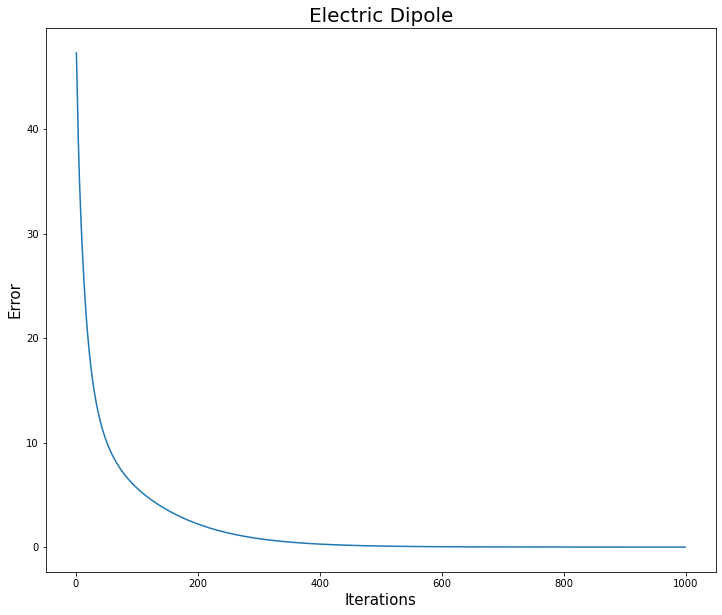

In [124]:
plt.plot(iters[1:], error[1:])
plt.xlabel("Iterations", fontsize = 15)
plt.ylabel("Error", fontsize = 15)
plt.title("Electric Dipole", fontsize = 20)
plt.show()

## Arbitrary Boundary Conditions

In [125]:

N= 50
V = np.zeros((N, N))

# Boundary Conditions
V[:,0]  = 9
V[:,N-1] = 9
V[0, 1:(N-1)] = 0
V[(N-1), 1:(N-1)] = 0
V[20, 20:30] = 9
V[30, 20:30] = 9
V[21:30, 20] = 0
V[21:30, 29] = 0 

# convergence arrays
def obj(V):
    return np.sum(V**2)
s = 0
error = []
iters = []

for iterations in range (0, 1000):

    for x in range (0, N-1):
        for y in range (0, N-1):

            V[x, y] = (V[x-1, y] + V[x+1, y] + V[x, y+1] + V[x, y-1])/4
            
            # Reinforcing Boundaries
            V[:,0]  = 9
            V[:,N-1] = 9
            V[0, 1:(N-1)] = 0
            V[(N-1), 1:(N-1)] = 0
            V[20, 20:30] = 9
            V[30, 20:30] = 9
            V[21:30, 20] = 0
            V[21:30, 29] = 0
            
    # Convergence calculations       
    sp = s 
    s = obj(V)
    err = s-sp
    error.append(err)
    iters.append(iterations)

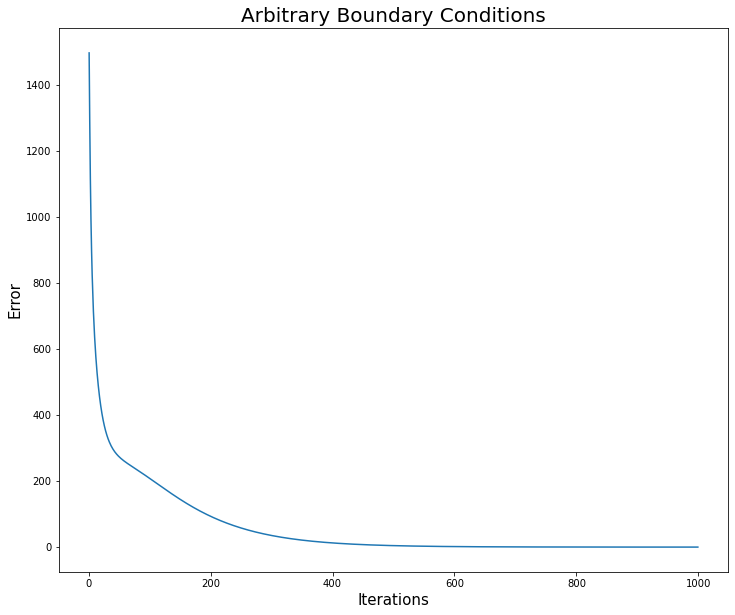

In [126]:
plt.plot(iters[1:], error[1:])
plt.xlabel("Iterations", fontsize = 15)
plt.ylabel("Error", fontsize = 15)
plt.title("Arbitrary Boundary Conditions", fontsize = 20)
plt.show()

# Square network of random resistors

## A check of the algorithm with uniform resistance network

In [274]:
# Generate a lattice
N = 50
V = np.zeros((N, N))
V[0 , :] = 9  
V[N-1 , :] = -9

R = np.full((N,N), 100) 

In [275]:
print(R)

[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


In [276]:
for iters in range(500):
    for x in range (0, N):
            for y in range (0, N):

                V[x, y] = (1/R[(2*x)%N, y%N] + 1/R[(2*x)%N, (y-1)%N] + 1/R[(2*x+1)%N, y%N] 
                           + 1/R[(2*x-1)%N, y%N])**(-1) * (V[x%N, (y+1)%N]/R[(2*x)%N, y%N] + 
                                                     V[x%N,(y-1)%N]/R[2*x%N, (y-1)%N] + V[(x+1)%N,(y)%N]/R[(2*x+1)%N,y%N] 
                                                     + V[(x-1)%N, y%N]/R[(2*x-1)%N, y%N])
                V[0 , :] = 9  
                V[N-1 , :] = -9

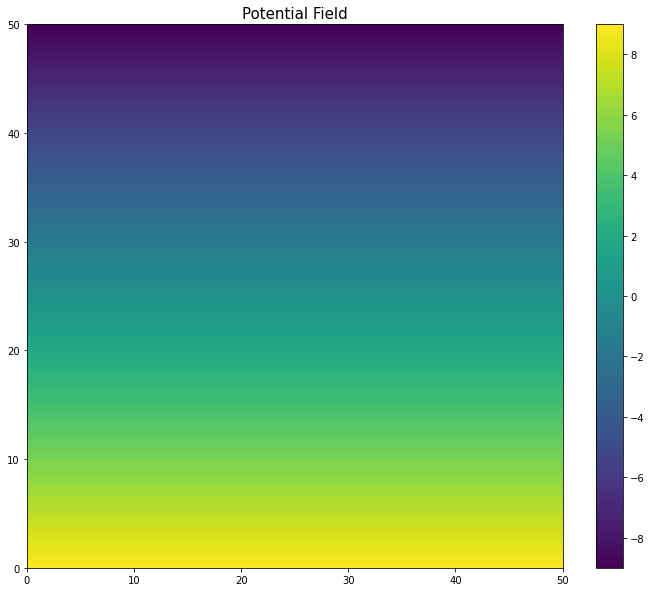

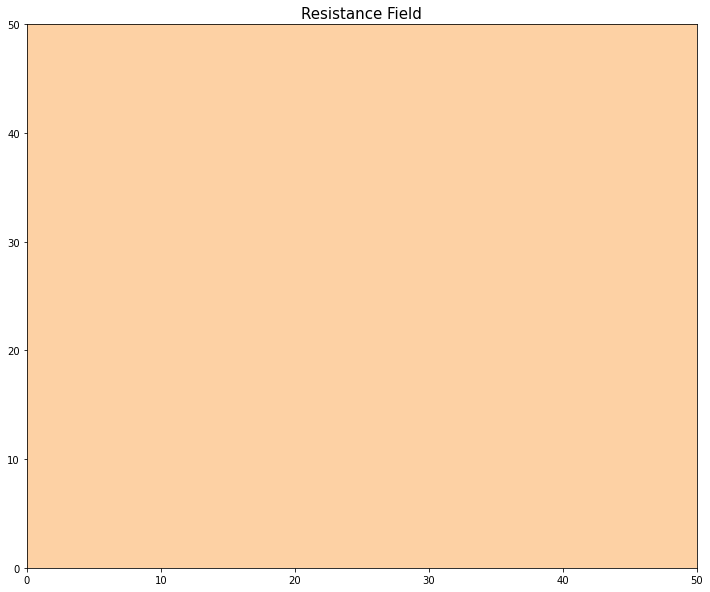

In [277]:
#Contour Plot
xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = V

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 100)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Potential Field', fontsize = 15)
plt.show()

xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = R

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 40, cmap = 'Oranges')
#fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Resistance Field', fontsize = 15)
plt.show()

## Inhomogenous resistance network

In [267]:
# Generate a lattice
N = 50
V = np.zeros((N, N))
V[0 , :] = 9  
V[N-1 , :] = -9

# Generate a random resistance network
R = np.random.random((N,N))*100

In [268]:
print(R)

[[57.84532638 35.48569232 74.63624012 ... 79.15684918 64.51826364
  51.7854602 ]
 [69.49128766 52.64957911 61.044531   ... 24.15127243 91.54987081
  37.60967565]
 [80.90172467 29.10824491 52.31982233 ... 84.96508923  6.93728024
  62.15120638]
 ...
 [30.952861   67.52877594 12.79292937 ... 11.87213535 22.06369474
  50.81662872]
 [74.05721095 32.22079635 67.03687721 ...  1.37807178 76.59800797
  90.65127158]
 [83.26904441 65.66741435 81.49038286 ...  6.11345617 62.45910362
  32.74552496]]


In [269]:
for iters in range(500):
    for x in range (0, N):
            for y in range (0, N):

                V[x, y] = (1/R[(2*x)%N, y%N] + 1/R[(2*x)%N, (y-1)%N] + 1/R[(2*x+1)%N, y%N] 
                           + 1/R[(2*x-1)%N, y%N])**(-1) * (V[x%N, (y+1)%N]/R[(2*x)%N, y%N] + 
                                                     V[x%N,(y-1)%N]/R[2*x%N, (y-1)%N] + V[(x+1)%N,(y)%N]/R[(2*x+1)%N,y%N] 
                                                     + V[(x-1)%N, y%N]/R[(2*x-1)%N, y%N])
                V[0 , :] = 9  
                V[N-1 , :] = -9

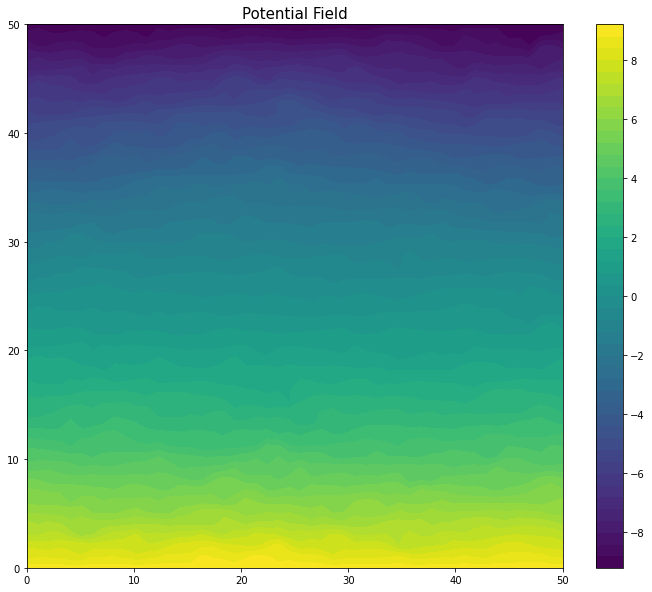

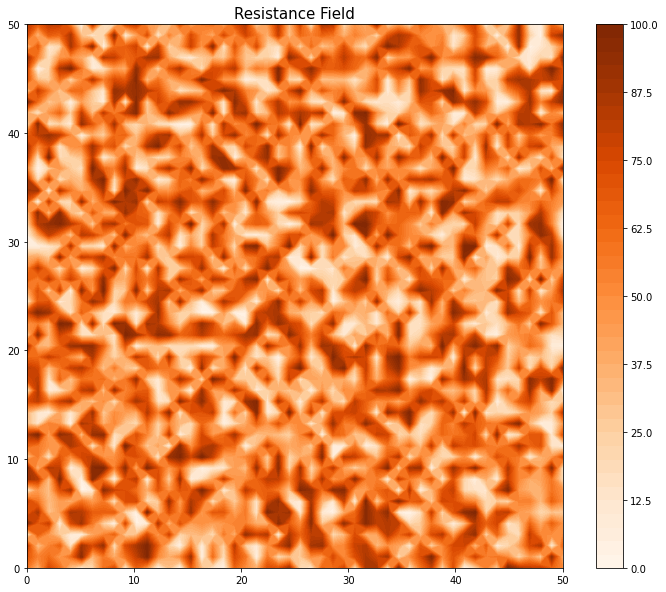

In [273]:
#Contour Plot
xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = V

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Potential Field', fontsize = 15)
plt.show()

xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = R

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 40, cmap = 'Oranges')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Resistance Field', fontsize = 15)
plt.show()

## Let's get creative with our resistance field

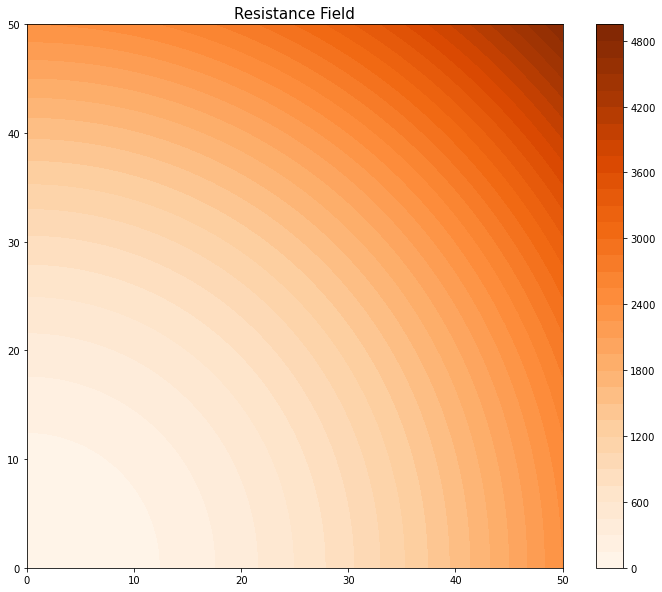

In [264]:
# Generate a lattice
N = 50
V = np.zeros((N, N))
V[0 , :] = 9  
V[N-1 , :] = -9

# Generate a random resistance network
R = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        R[i, j] = 1 + i**2 + j**2

# Visualize this experimental resistance field
xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = R

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 40, cmap = 'Oranges')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Resistance Field', fontsize = 15)
plt.show()

In [265]:
for iters in range(500):
    for x in range (0, N):
            for y in range (0, N):

                V[x, y] = (1/R[(2*x)%N, y%N] + 1/R[(2*x)%N, (y-1)%N] + 1/R[(2*x+1)%N, y%N] 
                           + 1/R[(2*x-1)%N, y%N])**(-1) * (V[x%N, (y+1)%N]/R[(2*x)%N, y%N] + 
                                                     V[x%N,(y-1)%N]/R[2*x%N, (y-1)%N] + V[(x+1)%N,(y)%N]/R[(2*x+1)%N,y%N] 
                                                     + V[(x-1)%N, y%N]/R[(2*x-1)%N, y%N])
                V[0 , :] = 9  
                V[N-1 , :] = -9

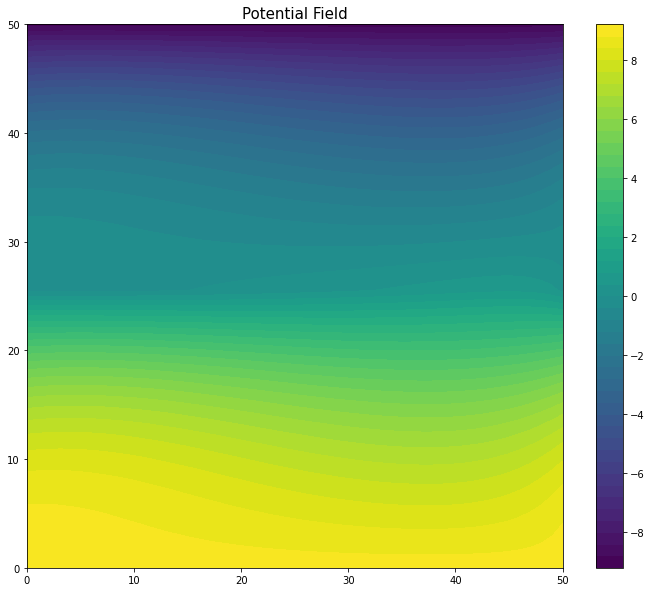

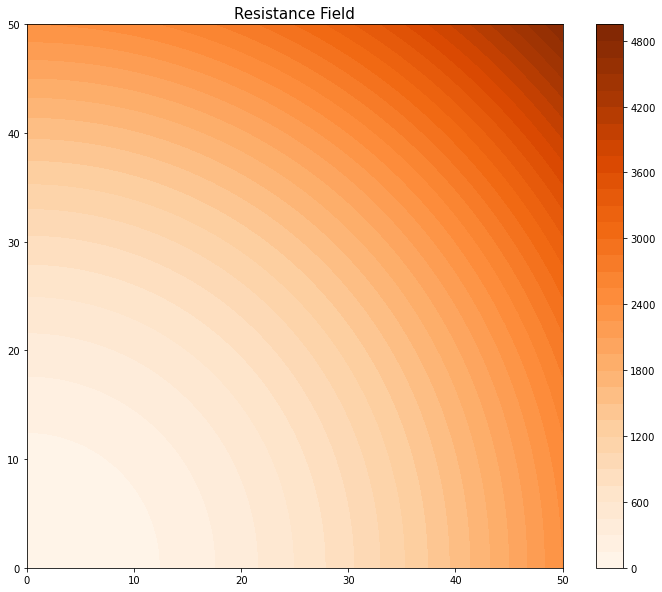

In [266]:
#Contour Plot
xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = V

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 50)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Potential Field', fontsize = 15)
plt.show()

xlist = np.linspace(0, N, N)
ylist = np.linspace(0, N, N)

Z = R

X, Y = np.meshgrid(xlist, ylist)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, 40, cmap = 'Oranges')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Resistance Field', fontsize = 15)
plt.show()